In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [6]:
df['promotion_last_5years'].unique()

array([0, 1], dtype=int64)

In [7]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [8]:
df.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [9]:
#Average Daily working hours
df.mean()['average_montly_hours']/30

6.7016778896370868

In [10]:
#The no of people who have left and also number of people who have stayed behind

print("{} have left".format(df[df['left']== 1].size))
print("{} have stayed".format(df[df['left']== 0].size))

35710 have left
114280 have stayed


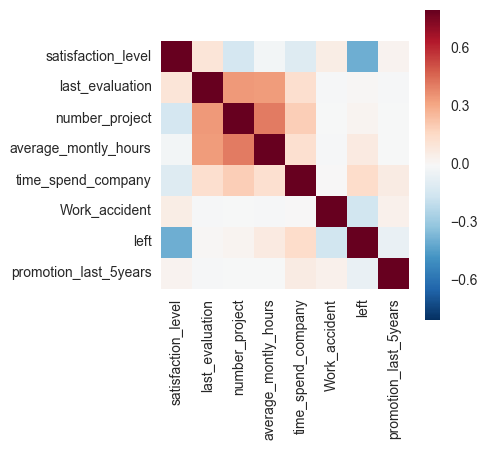

In [11]:
#Corelation Matrix overall
corrmat = df.corr()
f, ax = plt.subplots(figsize=(4, 4))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

### As expected:

* 1, the more satisfcation, the higer score of evaluation, and the less being left
* 2, the more projects in hands, the more monthly working hour, and result in a higher score of last time evaluation(?) but being less satisfied. And spending more time in company, btw.
* 3, being promoted(aka. level up) more poeple happier, doing more job and being less likely to run away"""

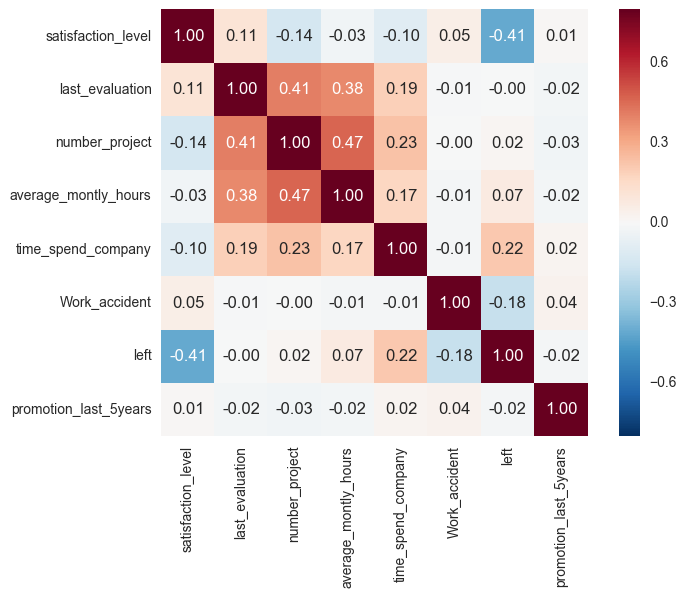

In [13]:
#Corelation Matrix as per Salary
corrmat_low = df[df['salary']== 'low'].corr()
corrmat_medium = df[df['salary']== 'medium'].corr()
corrmat_high = df[df['salary']== 'high'].corr()

sns.heatmap(corrmat_low, vmax=.8, square=True,annot=True,fmt='.2f')

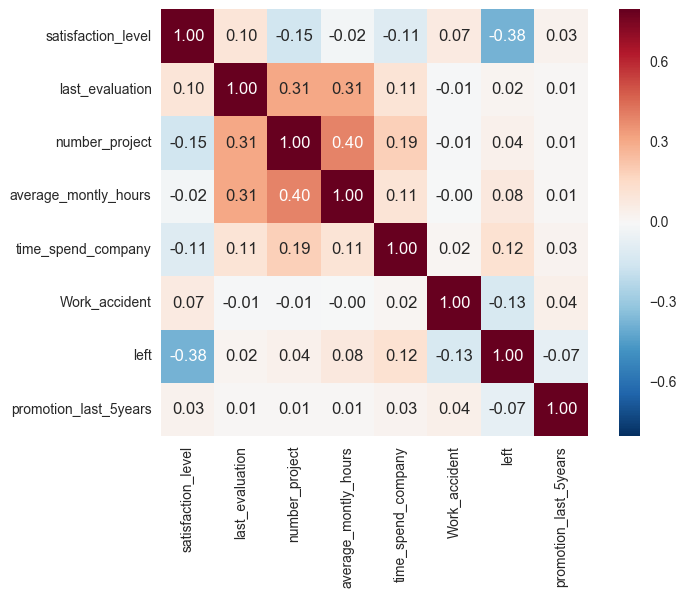

In [14]:
sns.heatmap(corrmat_medium, vmax=.8, square=True,annot=True,fmt='.2f')

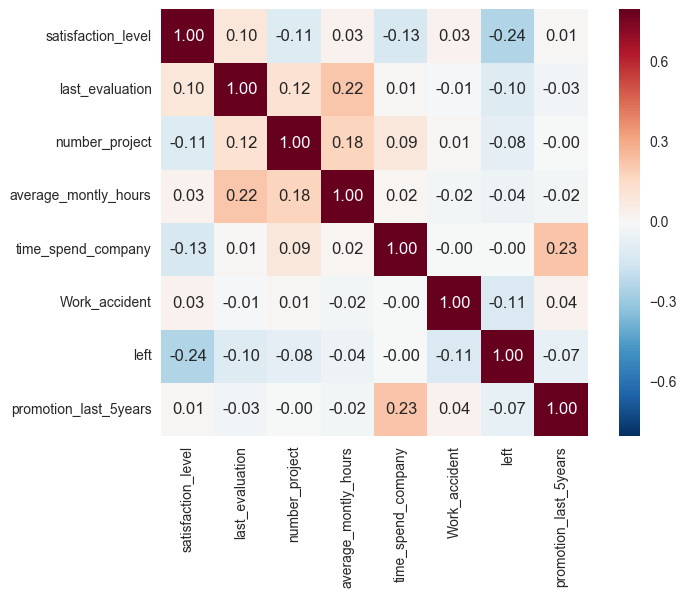

In [15]:
sns.heatmap(corrmat_high, vmax=.8, square=True,annot=True,fmt='.2f')

# Even Though I print out correlation digits... it's still hard to tell how salaries affect people's mentality

In [16]:
df_low = df[df['salary'] == 'low']
df_medium = df[df['salary'] == 'medium']
df_high = df[df['salary'] == 'high']

print('{} with low salary '.format(df_low.size))
print('{} with medium salary'.format(df_medium.size))
print('{} with high salary'.format(df_high.size))

73160 with low salary 
64460 with medium salary
12370 with high salary


In [17]:
fmt = '{:<22}{:<25}{}'

print(fmt.format('', 'mean', 'std'))
for i, (mean, std) in enumerate(zip(df_low.mean(), df_low.std())):
    print(fmt.format(df_low.columns[i], mean, std))
print('\n')
for i, (mean, std) in enumerate(zip(df_medium.mean(), df_medium.std())):
    print(fmt.format(df_low.columns[i], mean, std))
print('\n')
for i, (mean, std) in enumerate(zip(df_high.mean(), df_high.std())):
    print(fmt.format(df_low.columns[i], mean, std))

                      mean                     std
satisfaction_level    0.6007531437944199       0.254593761941733
last_evaluation       0.717017495899394        0.17326060551822497
number_project        3.799890650628759        1.281822006837944
average_montly_hours  200.9965828321487        50.832214201477065
time_spend_company    3.4382176052487696       1.3038181669165836
Work_accident         0.14215418261344998      0.3492320742806306
left                  0.2968835429196282       0.45691601116040653
promotion_last_5years 0.009021323127392018     0.09455771250585635


satisfaction_level    0.6218166304685063       0.24506911590044703
last_evaluation       0.7173223704622999       0.17104288525984024
number_project        3.8135277691591685       1.2012316138017844
average_montly_hours  201.33834936394663       49.34418794966946
time_spend_company    3.52901023890785         1.5064420799217257
Work_accident         0.14536146447409246      0.35249224780337285
left                

# Now it's apparent that:

    high salary employees spend more time in company but working hour is less than the others in a month.
    high salary employees have been promoted more and felt more satisfied.
    high salary employees remain stayed more than left.
    high salary employees make more work accidents.



# Salary and Sale feature plot

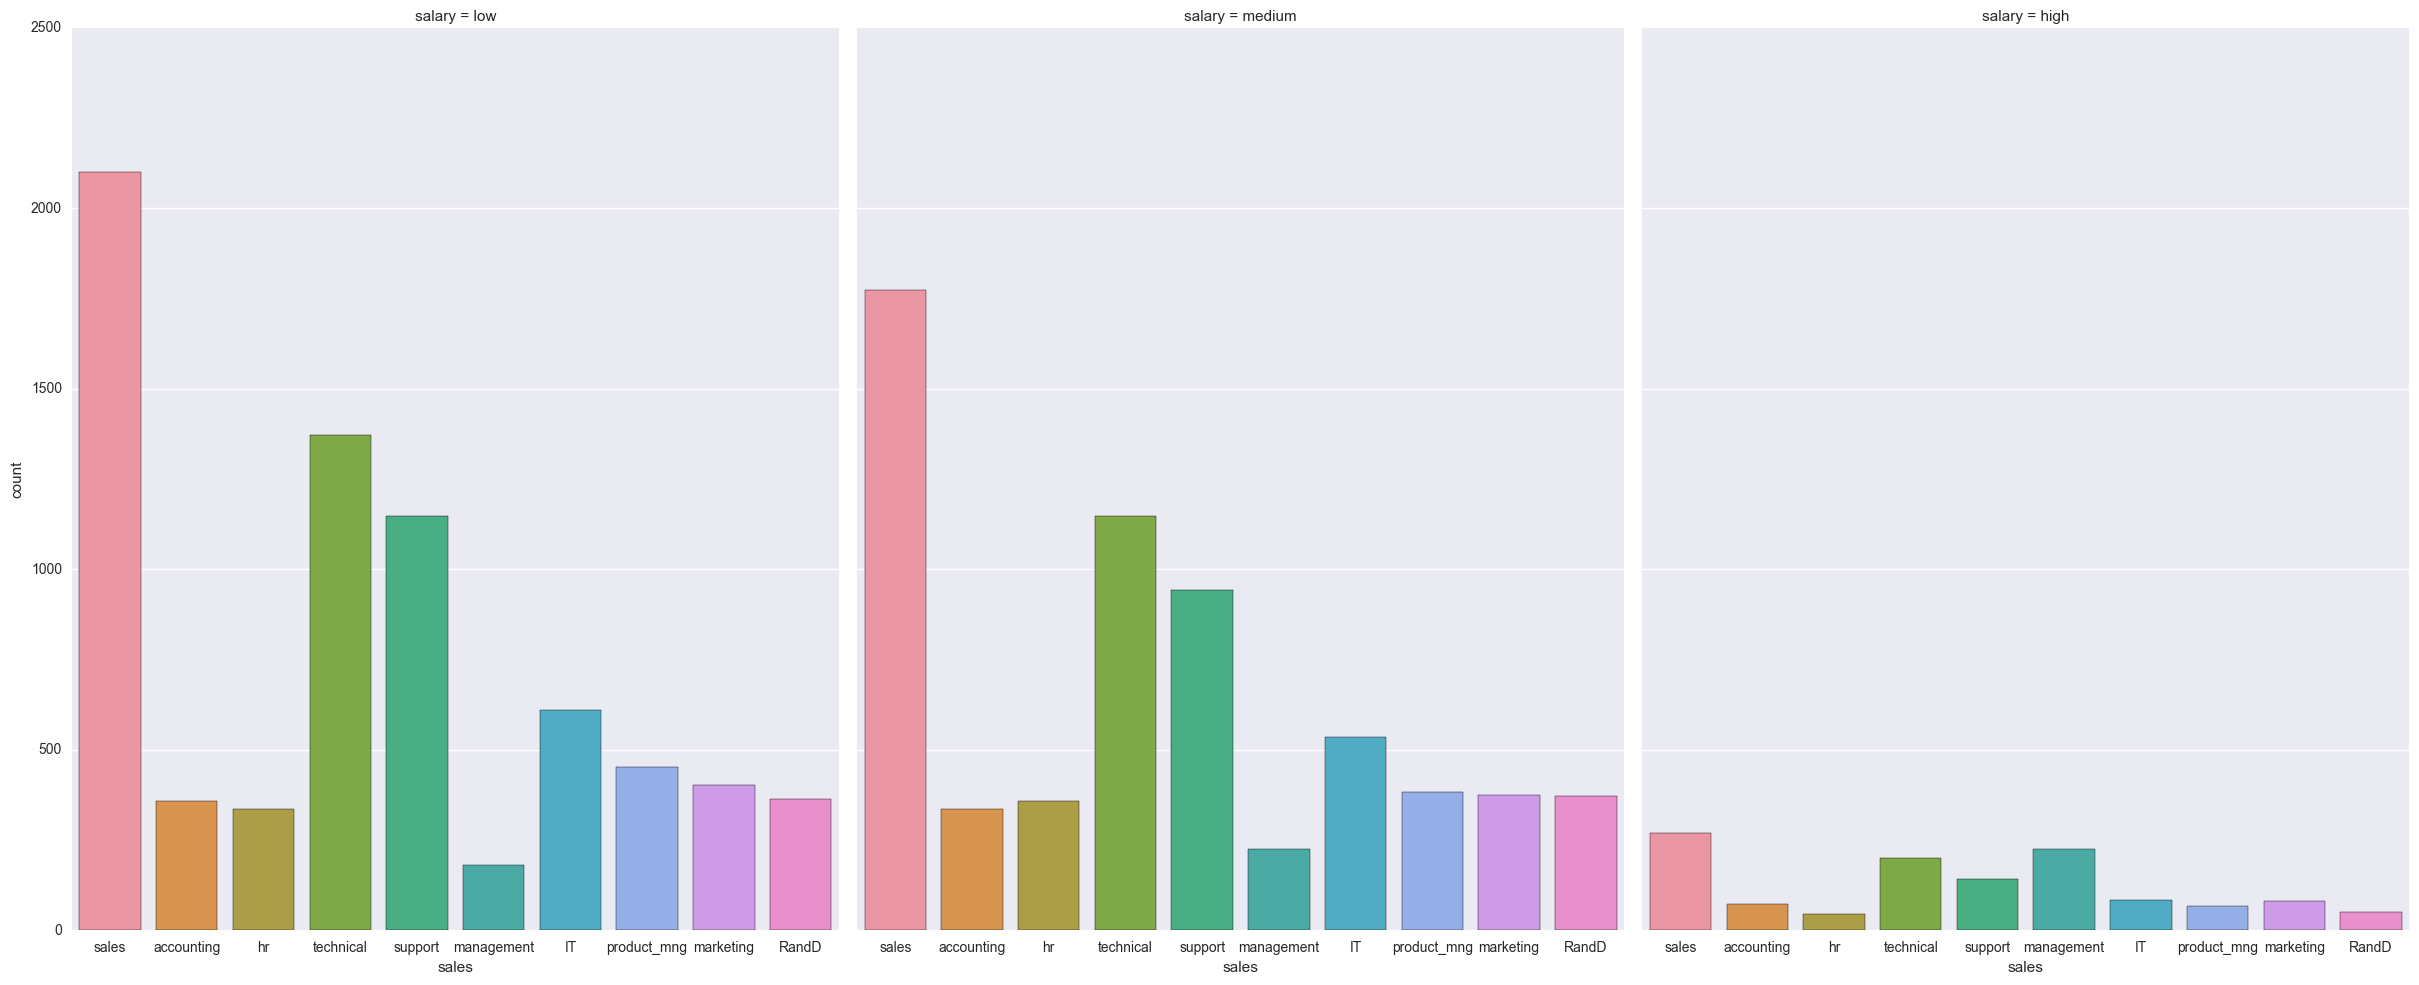

In [18]:
sns.factorplot("sales", col="salary", col_wrap=4, data=df, kind="count", size=10, aspect=.8)

# Satisfaction level by sales

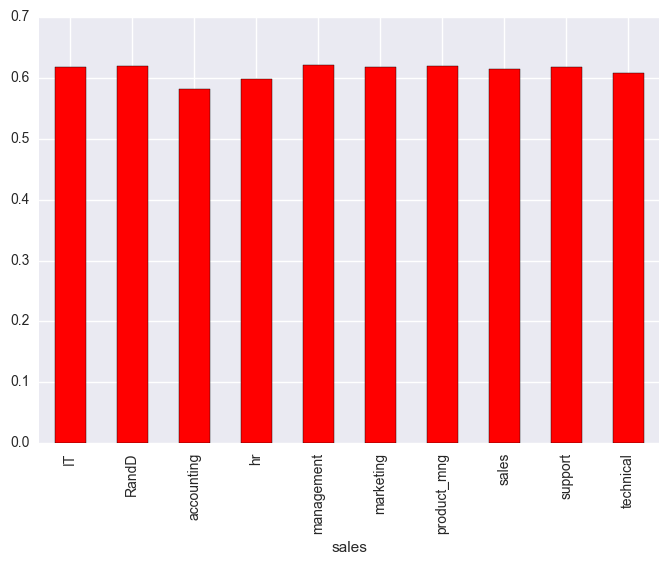

In [19]:
df.groupby('sales').mean()['satisfaction_level'].plot(kind='bar',color='r')

# I can see accountants are the most unhappy employees

# Predict 'left==1' by other features

In [20]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [21]:
df1 = pd.get_dummies(df)
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.11,0.88,7,272,4,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.72,0.87,5,223,5,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [22]:
y = df1['left'].values
df1 = df1.drop(['left'],axis=1)
X = df1.values

In [23]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.50)

In [24]:
log_reg = LogisticRegression()
log_reg.fit(Xtrain, ytrain)
y_val_l = log_reg.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_l).idxmax(axis=1).values
                                   == ytest)/len(ytest))

Validation accuracy:  0.792


In [25]:
sdg = SGDClassifier()
sdg.fit(Xtrain, ytrain)
y_val_l = sdg.predict(Xtest)
print("Validation accuracy: ", sum(y_val_l
                                   == ytest)/len(ytest))

Validation accuracy:  0.718666666667


In [26]:
radm = RandomForestClassifier()
radm.fit(Xtrain, ytrain)
y_val_l = radm.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_l).idxmax(axis=1).values
                                   == ytest)/len(ytest))

Validation accuracy:  0.981333333333


# RandomForest scores so high! Hmmm, it actually make sense because (we make up mind to quit a job by a serial decision making

In [27]:
indices = np.argsort(radm.feature_importances_)[::-1]

# Print the feature ranking
print('Feature ranking:')

for f in range(df1.shape[1]):
    print('%d. feature %d %s (%f)' % (f+1 , indices[f], df1.columns[indices[f]],
                                      radm.feature_importances_[indices[f]]))

Feature ranking:
1. feature 0 satisfaction_level (0.274714)
2. feature 2 number_project (0.196029)
3. feature 4 time_spend_company (0.190091)
4. feature 3 average_montly_hours (0.148110)
5. feature 1 last_evaluation (0.131696)
6. feature 5 Work_accident (0.014425)
7. feature 18 salary_low (0.008178)
8. feature 17 salary_high (0.006488)
9. feature 19 salary_medium (0.004644)
10. feature 14 sales_sales (0.004099)
11. feature 16 sales_technical (0.004086)
12. feature 15 sales_support (0.003357)
13. feature 10 sales_hr (0.002559)
14. feature 7 sales_IT (0.002428)
15. feature 8 sales_RandD (0.002204)
16. feature 9 sales_accounting (0.001960)
17. feature 6 promotion_last_5years (0.001692)
18. feature 12 sales_marketing (0.001423)
19. feature 13 sales_product_mng (0.000936)
20. feature 11 sales_management (0.000882)


# The above shows what are the primary factors for employees to quit the job.
    
    1, satisfaction_level
    2, time_spend_company
    3, number_project
    4, last_evaluation
# It all makes sense

# Happy Jamhuri Day